In [15]:
#Now, on to our hyperparameters.  You'll recall from lecture that 
#hyperparameters are parameters we must set - i.e., they are not fit by the model.
#"k" is one such hyperparameter - in the knn code we wrote in part 3 of this assignment, 
#we arbitrarily have it set to 5.  What we need is to find out the best parameter.

#Imports:
import numpy as np
from IPython.display import clear_output
import pickle
import matplotlib.pyplot as plt

#Classifier (copied from part 3):
class KNearestNeighbor:
    def __init__(self):
        pass
    def train(self, X, y):
        self.Xtr = X
        self.ytr = y
    def predict(self, X, k):        
        Ypred = np.zeros(len(X), dtype=np.dtype(self.ytr.dtype))
        for i in range(0, len(X)):
            l1Distances = np.sum(np.abs(self.Xtr - X[i]), axis=1)
            minimumIndices = np.argsort(l1Distances)
            kClosest = minimumIndices[:k]
            predClass, counts = np.unique(self.ytr[kClosest], return_counts=True)
            Ypred[i] = predClass[counts.argmax()]
            clear_output(wait=True)
            print(str(i) + " (" + str((i/len(X))*100) + "%)")
        return Ypred

#Load in our data / vectorize the Xs for computation speed
with open("testTrainLab1.pickle", "rb") as f:
    labData = pickle.load(f)
X_train = np.reshape(labData["X_train"], (labData["X_train"].shape[0], -1))
X_test = np.reshape(labData["X_test"], (labData["X_test"].shape[0], -1))
y_train = labData["y_train"]
y_test = labData["y_test"]

#Cutting down the sample for speed - as noted
#a few times now, KNN is very slow!
y_test = y_test[:250]
X_test = X_test[:250]
y_train = y_train[:250]
X_train = X_train[:250]

In [17]:
#The first step is to break our training data into some number of folds.
#As you'll recall from lecture, we'll use some of these folds for
#training, and some for validation.

folds = 4

X_folds = np.array_split(X_train, folds)
y_folds = np.array_split(y_train, folds)

#Now, we need to loop over our folds to get a cross-fold accuracy. 
#We can do that for just k=5 fairly simply:
accuracies = []
k = 5

for i in range(0,folds): 
    #Printing where we are for awareness
    print("Commencing fold " + str(i+1) + " for k = " + str(k))

    classifier = KNearestNeighbor()
    #The delete function lets us take all BUT one fold and use it for training.
    #We then concatenate the remaining folds into one list to use for training. 
    #You may want to print one of the np.delete's out to see what it does!
    classifier.train(np.concatenate(np.delete(X_folds, [i], axis=0)), 
                     np.concatenate(np.delete(y_folds, [i], axis=0)))

    #Now, we're going to generate predictions for only the one fold we didn't use in training
    #Then save the accuracy for this fold.
    predictions = classifier.predict(X_folds[i], k=k)
    correctCases = sum(predictions == y_folds[i])
    accuracy = correctCases / len(y_folds[i])
    accuracies.append(accuracy)

#From this, we can gather that our accuracy for this case is between
#~12.9% and 23.8% across folds,
print(accuracies)

#Or an average of ~19.2%
print(np.mean(accuracies))




61 (98.38709677419355%)
[0.2222222222222222, 0.23809523809523808, 0.1774193548387097, 0.12903225806451613]
0.19169226830517153


In [18]:
#Of course, the above is only checking one value of k - we're trying
#to find the best value for the hyperparameter!
#Here, we implement a loop testing 5 different ks:

k_to_test = [1, 5, 10, 20, 40]

allAccuracies = {}

for k in k_to_test:
    allAccuracies[k] = []
    for i in range(0,folds): 
        print("Commencing fold " + str(i+1) + " for k = " + str(k))

        classifier = KNearestNeighbor()
        classifier.train(np.concatenate(np.delete(X_folds, [i], axis=0)), 
                        np.concatenate(np.delete(y_folds, [i], axis=0)))
        predictions = classifier.predict(X_folds[i], k=k)

        correctCases = sum(predictions == y_folds[i])
        accuracy = correctCases / len(y_folds[i])
        allAccuracies[k].append(accuracy)


#Print it out in a pretty way:
for k in sorted(allAccuracies):
    fold = 1
    for accuracy in allAccuracies[k]:
        print('k = %d, fold = %d, accuracy = %f' % (k, fold, accuracy))
        fold = fold + 1

61 (98.38709677419355%)
k = 1, fold = 1, accuracy = 0.222222
k = 1, fold = 2, accuracy = 0.269841
k = 1, fold = 3, accuracy = 0.161290
k = 1, fold = 4, accuracy = 0.209677
k = 5, fold = 1, accuracy = 0.222222
k = 5, fold = 2, accuracy = 0.238095
k = 5, fold = 3, accuracy = 0.177419
k = 5, fold = 4, accuracy = 0.129032
k = 10, fold = 1, accuracy = 0.174603
k = 10, fold = 2, accuracy = 0.222222
k = 10, fold = 3, accuracy = 0.193548
k = 10, fold = 4, accuracy = 0.129032
k = 20, fold = 1, accuracy = 0.190476
k = 20, fold = 2, accuracy = 0.206349
k = 20, fold = 3, accuracy = 0.177419
k = 20, fold = 4, accuracy = 0.145161
k = 40, fold = 1, accuracy = 0.206349
k = 40, fold = 2, accuracy = 0.190476
k = 40, fold = 3, accuracy = 0.161290
k = 40, fold = 4, accuracy = 0.161290


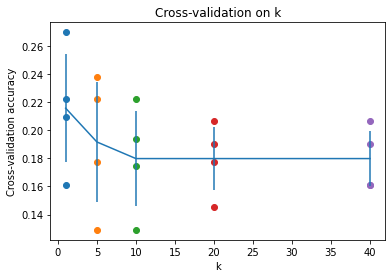

In [19]:
#Now, we want to visualize our findings - this type of visualization should be helpful in identifying
#the best K for your purposes.  Feel free to test different sample sizes (i.e., taking 1000 observations, or even all 50k!),
#numbers of folds, and values for k. What is the best K across your tests?
for k in k_to_test:
    accuracies = allAccuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(allAccuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(allAccuracies.items())])
plt.errorbar(k_to_test, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()